# Insurance Claims- Fraud Detection

### Problem statement:

Business case:

Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.

In this project, We are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. 

We will be working with some auto insurance data to create a predictive model that predicts if an insurance claim is fraudulent or not. 

In [1]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [24]:
df  = pd.read_csv("Automobile_insurance_fraud.csv")
pd.set_option('display.max_columns', None)
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,17-02-2015,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,FEMALE,Masters,craft-repair,paintball,unmarried,0,0,22-02-2015,Single Vehicle Collision,Front Collision,Minor Damage,Fire,NC,Northbrook,6045 Andromedia St,20,1,YES,0,1,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,FEMALE,PhD,prof-specialty,sleeping,wife,70900,0,24-01-2015,Single Vehicle Collision,Rear Collision,Major Damage,Fire,SC,Northbend,3092 Texas Drive,23,1,YES,2,3,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,FEMALE,Masters,armed-forces,bungie-jumping,other-relative,35100,0,23-01-2015,Multi-vehicle Collision,Side Collision,Minor Damage,Police,NC,Arlington,7629 5th St,4,3,?,2,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,MALE,Associate,handlers-cleaners,base-jumping,wife,0,0,26-02-2015,Single Vehicle Collision,Rear Collision,Major Damage,Other,NY,Arlington,6128 Elm Lane,2,1,?,0,1,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


In [42]:
df["insured_zip"].unique

<bound method Series.unique of 0      466132
1      468176
2      430632
3      608117
4      610706
        ...  
995    431289
996    608177
997    442797
998    441714
999    612260
Name: insured_zip, Length: 1000, dtype: int64>

In [26]:
df.shape

(1000, 40)

The dataset contains :

Number of columns = 40

number of rows = 1000

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [28]:
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [29]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

_c39 is an empty feature having no observations,therefore we'll drop this feature.

In [30]:
df = df.drop("_c39",axis =1)

In [31]:
df.shape

(1000, 39)

The New dataset contains :

Number of columns = 39

number of rows = 1000

In [32]:
#we observed that there are '?' present in the some features ,which indicates missing values,so first we'll replace it with NaN values and then we'll further remove the missing values
df = df.replace('?',np.NaN)
df.isnull().sum()

months_as_customer               0
age                              0
policy_number                    0
policy_bind_date                 0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_zip                      0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_date                    0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted            0
incident_state                   0
incident_city                    0
incident_location                0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries     

In [33]:
df_miss_val = df[["collision_type","property_damage","police_report_available"]]

In [34]:
#here we'll be removing the null values using ffill 
for i in df_miss_val:
    df[i] = df[i].fillna(method='ffill')
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,Side Collision,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,YES,0,0,YES,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,NO,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,17-02-2015,Vehicle Theft,Front Collision,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,FEMALE,Masters,craft-repair,paintball,unmarried,0,0,22-02-2015,Single Vehicle Collision,Front Collision,Minor Damage,Fire,NC,Northbrook,6045 Andromedia St,20,1,YES,0,1,YES,87200,17440,8720,61040,Honda,Accord,2006,N
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,FEMALE,PhD,prof-specialty,sleeping,wife,70900,0,24-01-2015,Single Vehicle Collision,Rear Collision,Major Damage,Fire,SC,Northbend,3092 Texas Drive,23,1,YES,2,3,YES,108480,18080,18080,72320,Volkswagen,Passat,2015,N
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,FEMALE,Masters,armed-forces,bungie-jumping,other-relative,35100,0,23-01-2015,Multi-vehicle Collision,Side Collision,Minor Damage,Police,NC,Arlington,7629 5th St,4,3,YES,2,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,MALE,Associate,handlers-cleaners,base-jumping,wife,0,0,26-02-2015,Single Vehicle Collision,Rear Collision,Major Damage,Other,NY,Arlington,6128 Elm Lane,2,1,YES,0,1,YES,46980,5220,5220,36540,Audi,A5,1998,N


In [35]:
df.isnull().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

In [203]:
#So we have removed all the null values from the features.

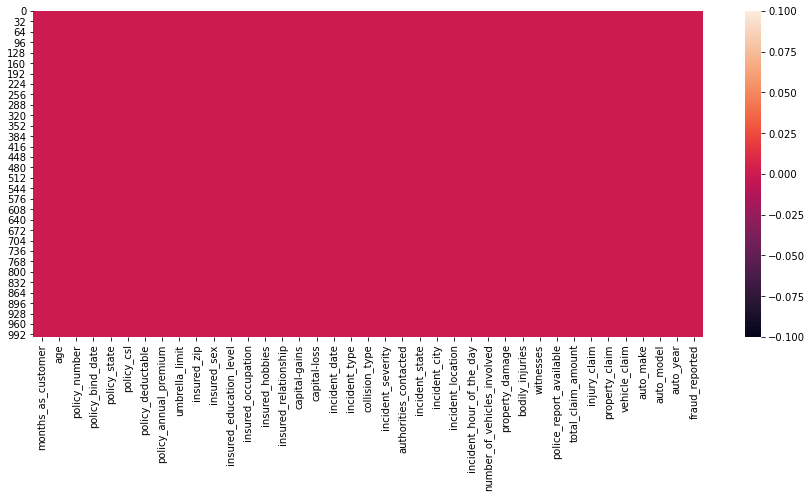

In [43]:
plt.figure(figsize = [15,6])
sns.heatmap(df.isnull())

In [44]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

In [204]:
#Now we'll be dividing the features into two categories ,i.e.,contionous and categorical features.

In [45]:
df_continous = df[["months_as_customer","age","policy_deductable","policy_annual_premium","umbrella_limit","insured_zip","capital-gains","capital-loss",
                  "incident_hour_of_the_day","number_of_vehicles_involved","bodily_injuries","witnesses",'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim',]]

In [50]:
df_categorical = df.drop(["months_as_customer","age","policy_deductable","policy_annual_premium","umbrella_limit","insured_zip","capital-gains","capital-loss",
                  "incident_hour_of_the_day","number_of_vehicles_involved","bodily_injuries","witnesses",'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim','policy_number','policy_bind_date','incident_location','auto_model'],axis = 1)

In [46]:
df_continous.describe()

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000
std,115.113174,9.140287,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893
min,0.000000,19.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000
25%,115.750000,32.000000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000
50%,199.500000,38.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000
75%,276.250000,44.000000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000
max,479.000000,64.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000


In [47]:
print("observations:")
for i in df_continous:
    print("Mean of the ",i,"is :", round(df_continous[i].mean(),3))
    print("Median of the ",i,"is :",round(df_continous[i].median(),3))
    print("Standard deviation of ",i,"is :" , round(df_continous[i].std(),3))
    print("Minimum value of ",i,"is :", round(df_continous[i].min(),3))
    print("75th Quantile of ",i,"is :", round(df_continous[i].quantile(0.75),3))
    print("Maximum value of ",i,"is :", round(df_continous[i].max(),3))
    x = input("Observation : \n")
    print("\n\n")

observations:
Mean of the  months_as_customer is : 203.954
Median of the  months_as_customer is : 199.5
Standard deviation of  months_as_customer is : 115.113
Minimum value of  months_as_customer is : 0
75th Quantile of  months_as_customer is : 276.25
Maximum value of  months_as_customer is : 479
Observation : 
The mean is greater than median means the data is right skewed. Standard deviation is very huge.there is also a large difference between 75th quantile and maximum value which means may be outliers are present 



Mean of the  age is : 38.948
Median of the  age is : 38.0
Standard deviation of  age is : 9.14
Minimum value of  age is : 19
75th Quantile of  age is : 44.0
Maximum value of  age is : 64
Observation : 
The mean and median are almost similar. standard deviation is very low.very less difference between maximum value and 75th quantile.



Mean of the  policy_deductable is : 1136.0
Median of the  policy_deductable is : 1000.0
Standard deviation of  policy_deductable is : 61

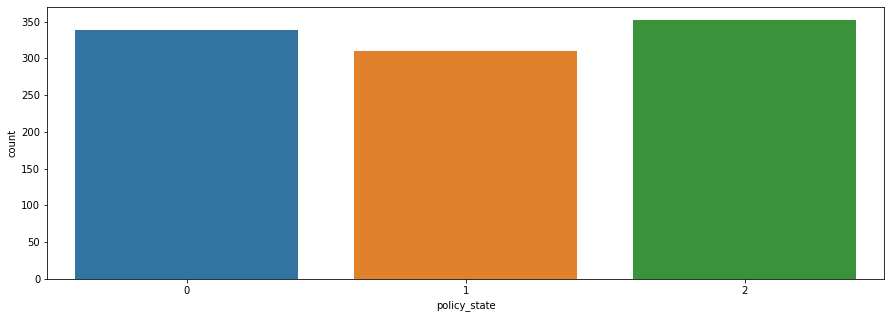

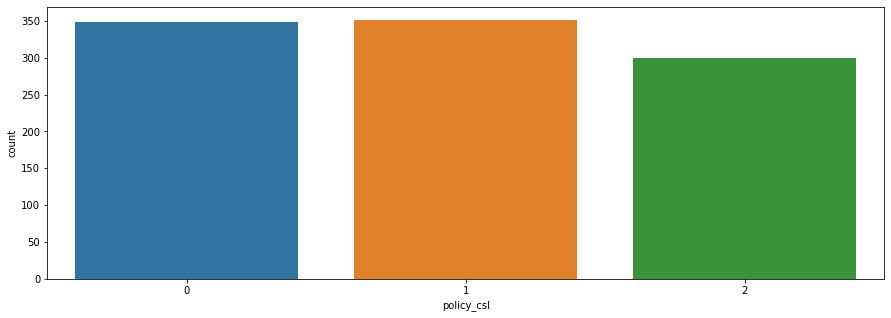

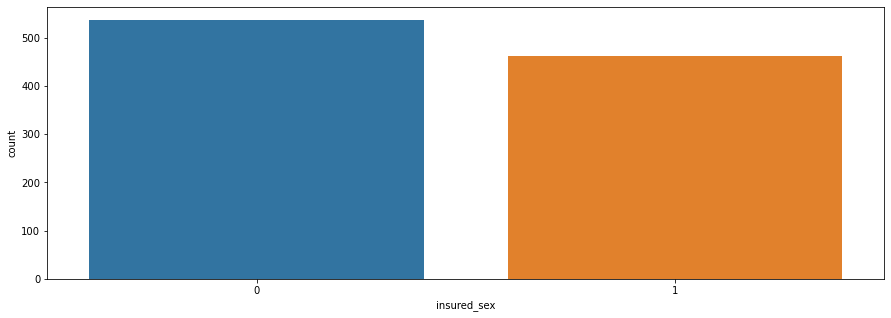

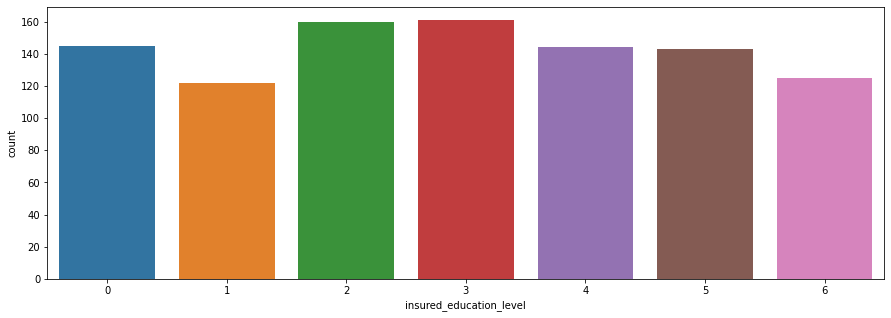

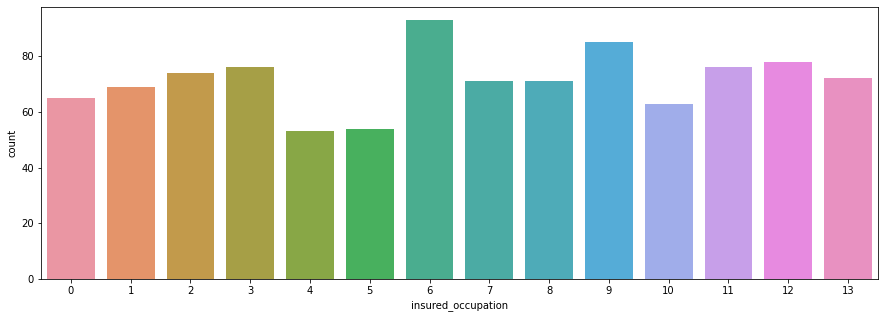

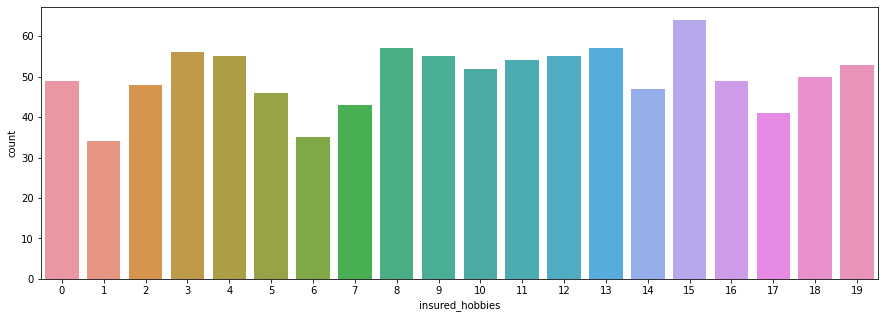

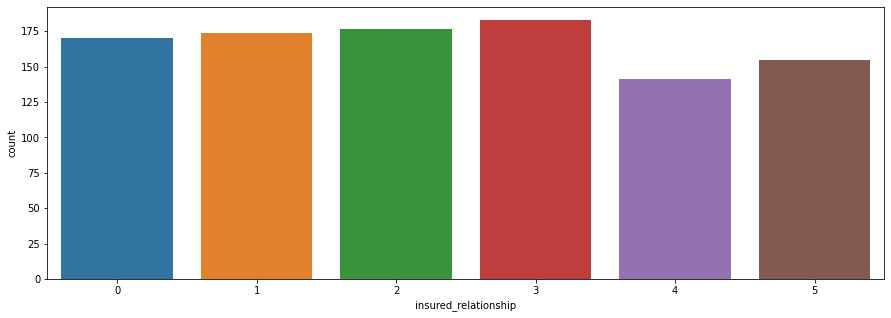

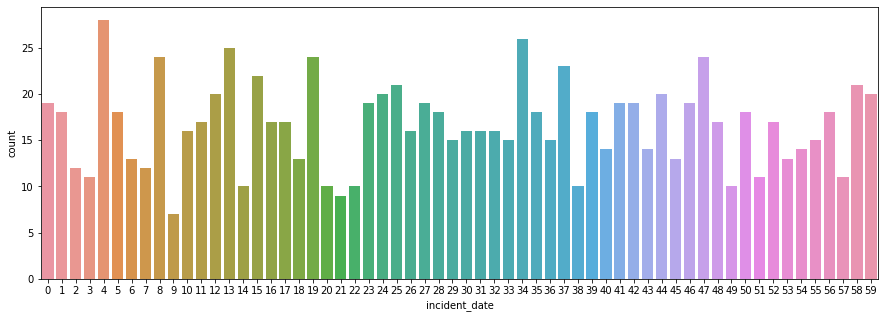

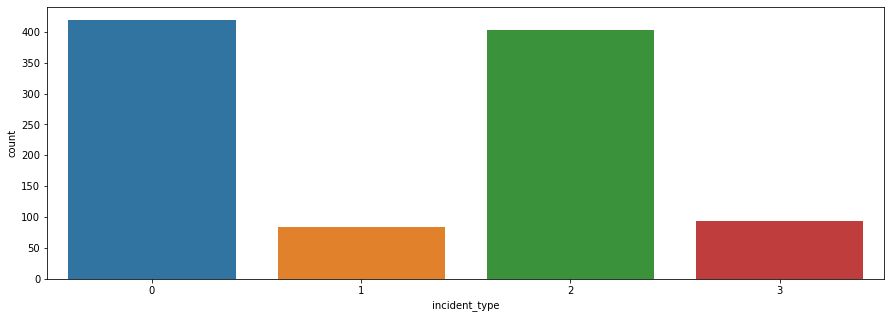

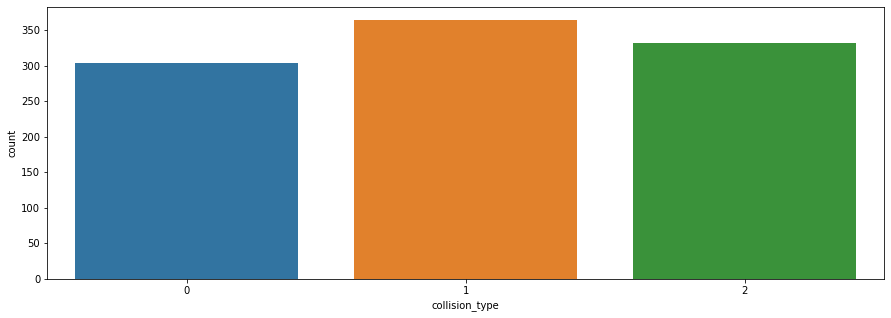

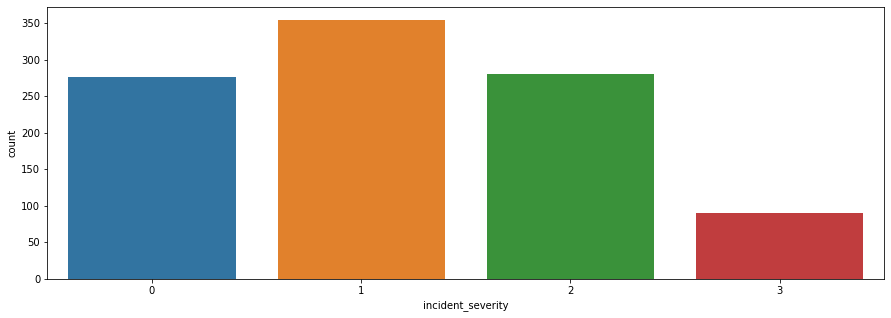

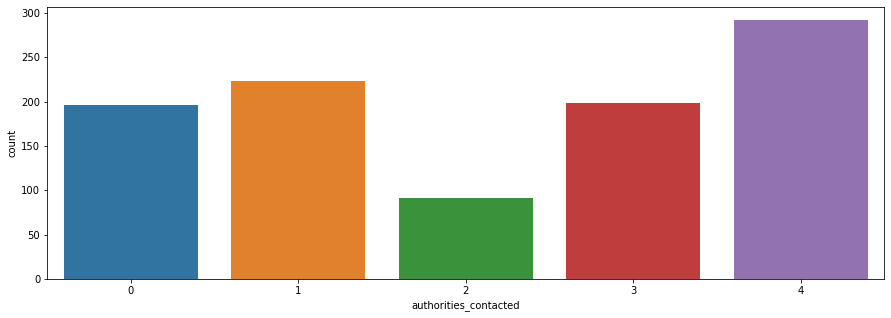

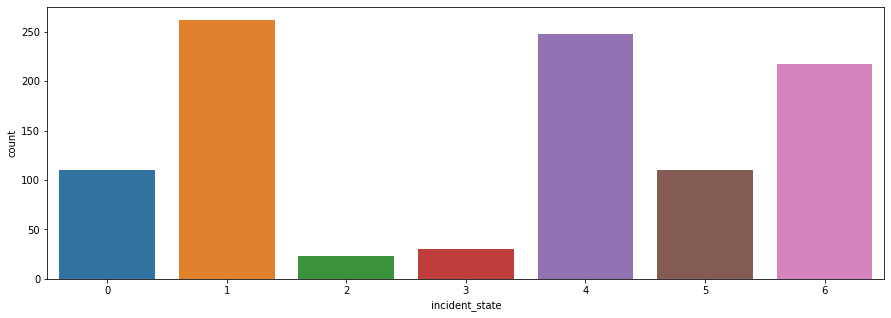

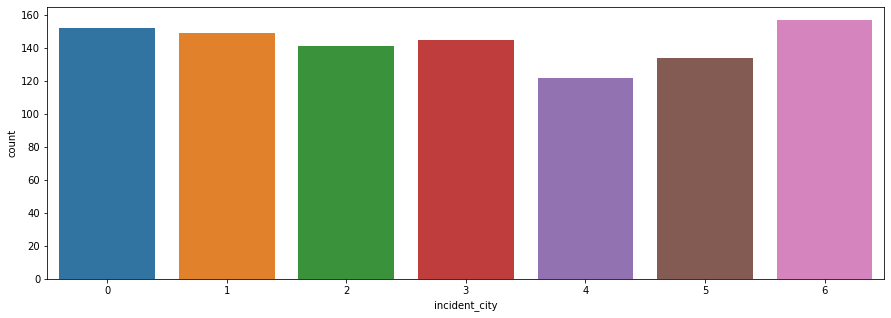

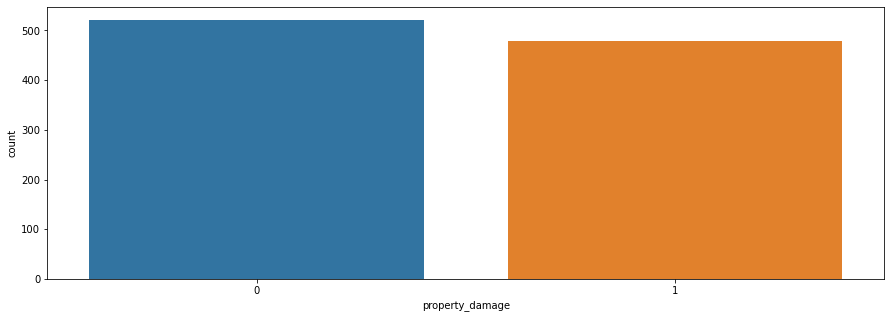

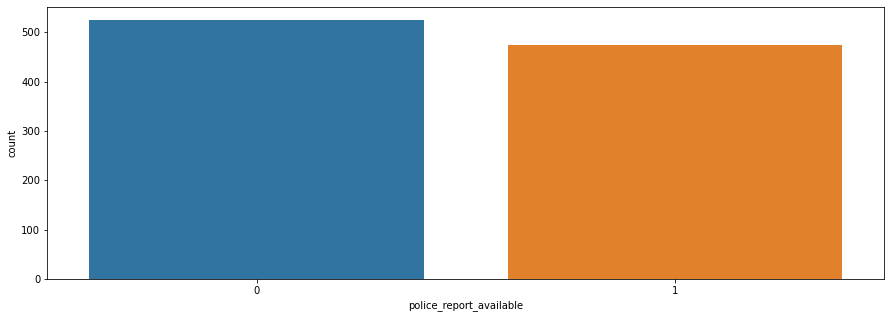

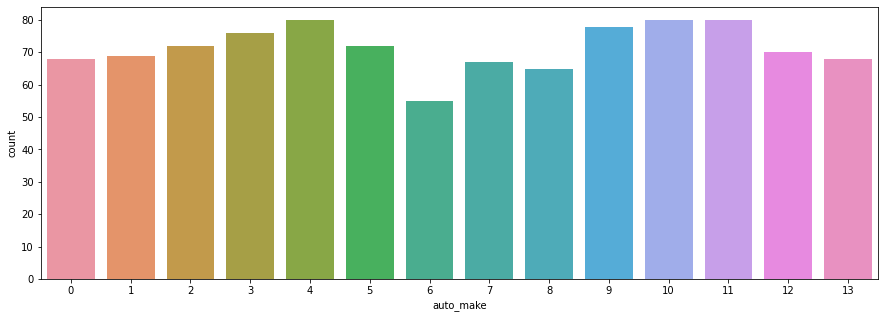

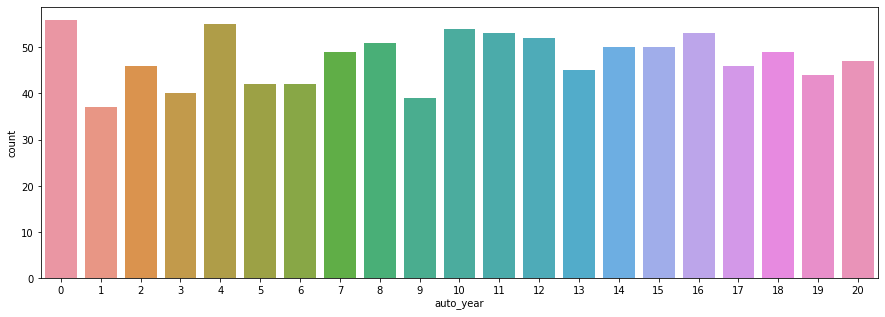

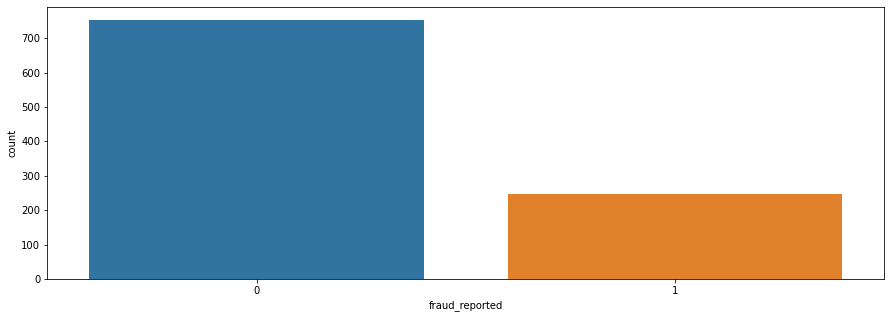

In [207]:
for i in df_categorical:
    plt.figure(figsize = [15,5])
    sns.countplot(df[i])
    plt.show()

Observations :

Fruad reported has high difference between the two categories that is yes and no.So,we'll balance it using appropriate method.

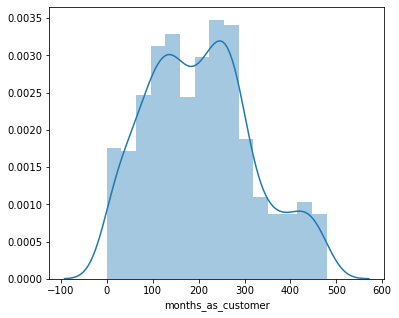

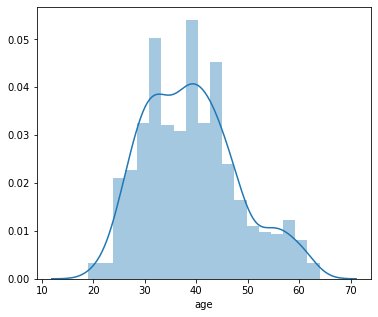

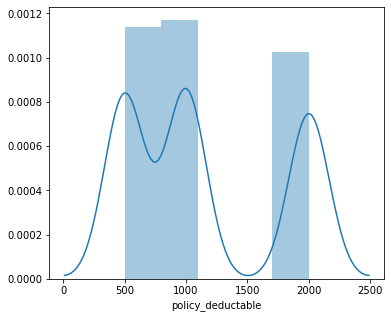

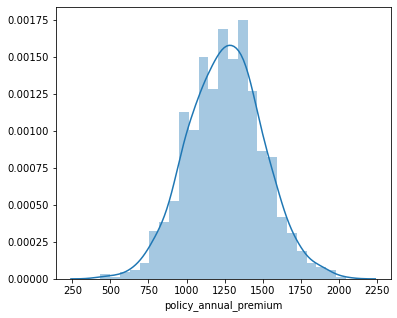

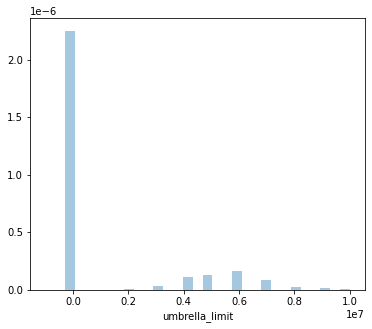

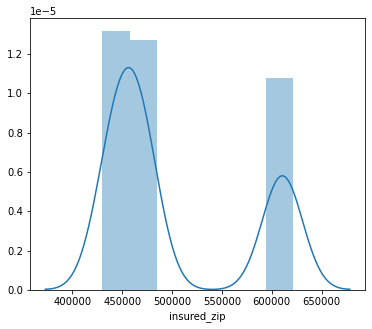

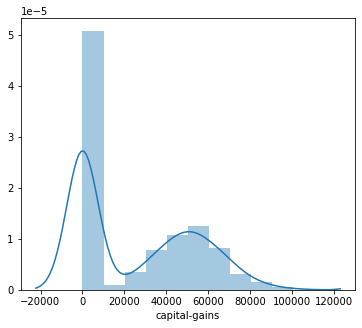

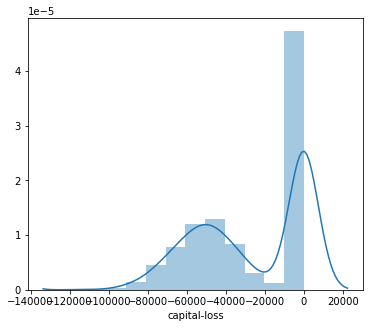

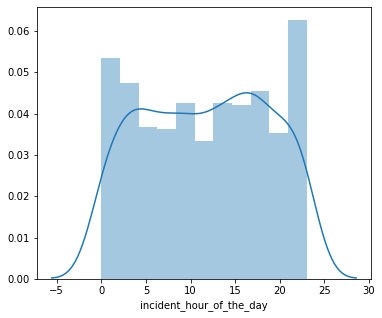

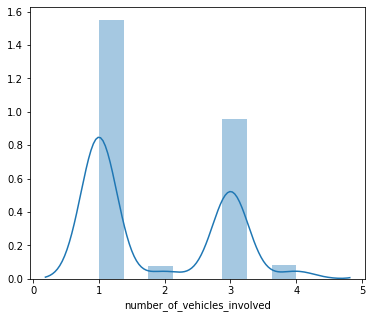

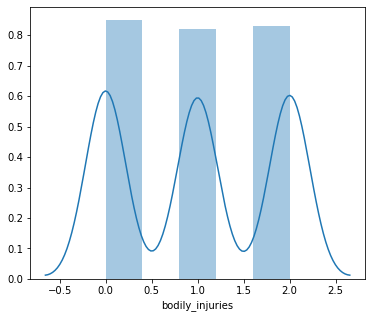

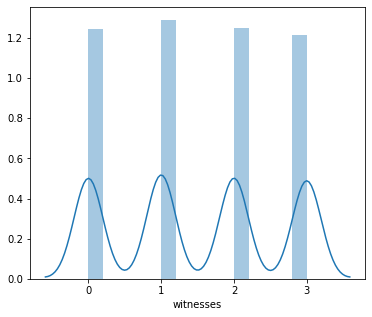

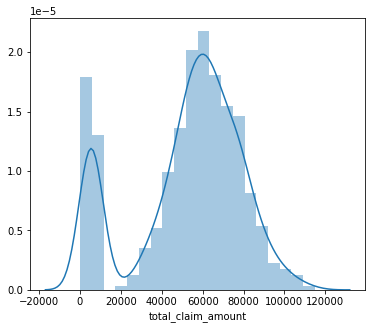

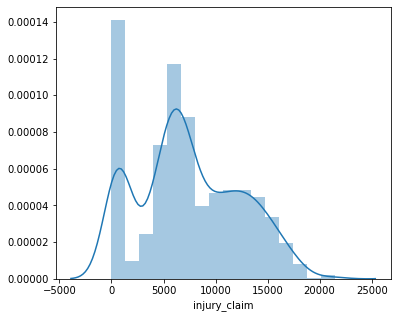

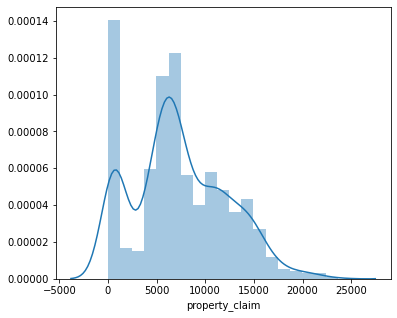

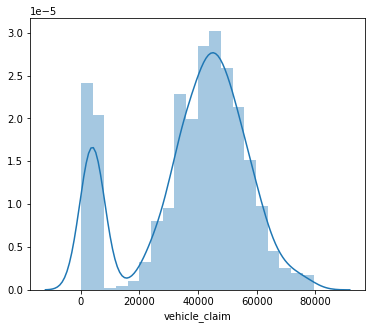

In [54]:
for i in df_continous:
    plt.figure(figsize = [6,5])
    plt.xlabel(i)
    sns.distplot(df_continous[[i]],kde = True)
    plt.show()

observations: 
1. Policy annual premium is normally distributed.
2. Months ad customer,age,incident hours of the day are highly spreaded.
   
   Not much can be predicted from other graphs.

<Figure size 432x360 with 0 Axes>

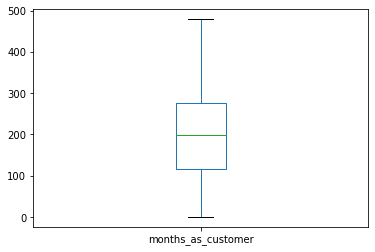

<Figure size 432x360 with 0 Axes>

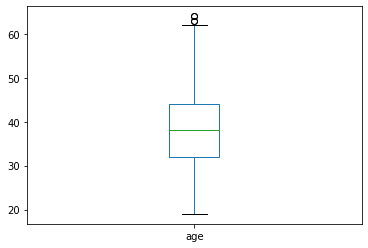

<Figure size 432x360 with 0 Axes>

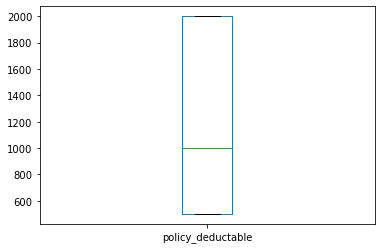

<Figure size 432x360 with 0 Axes>

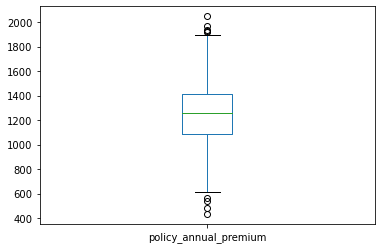

<Figure size 432x360 with 0 Axes>

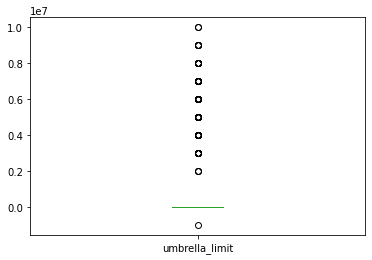

<Figure size 432x360 with 0 Axes>

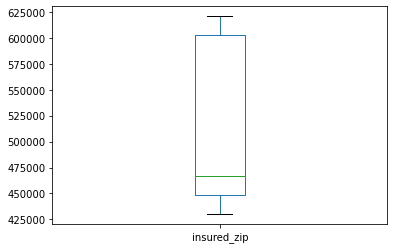

<Figure size 432x360 with 0 Axes>

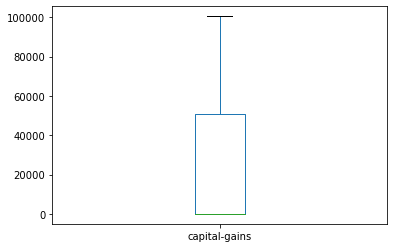

<Figure size 432x360 with 0 Axes>

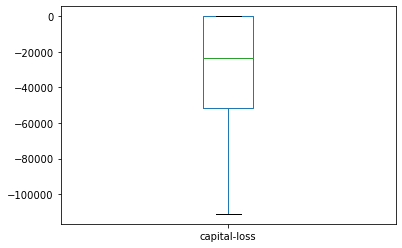

<Figure size 432x360 with 0 Axes>

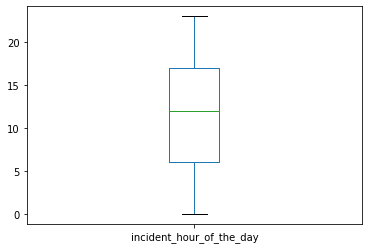

<Figure size 432x360 with 0 Axes>

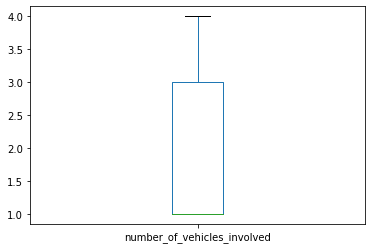

<Figure size 432x360 with 0 Axes>

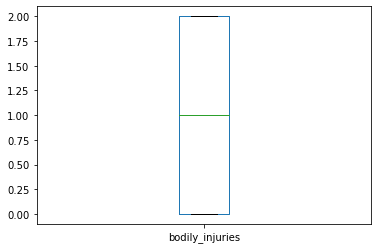

<Figure size 432x360 with 0 Axes>

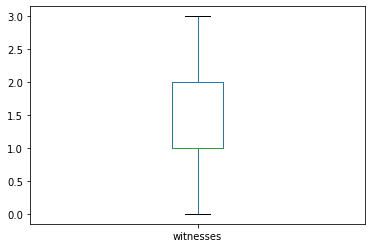

<Figure size 432x360 with 0 Axes>

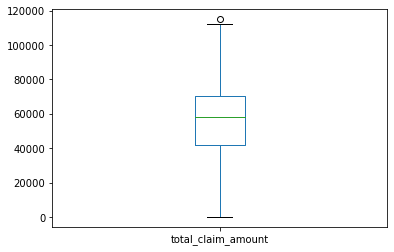

<Figure size 432x360 with 0 Axes>

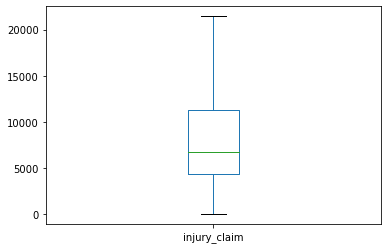

<Figure size 432x360 with 0 Axes>

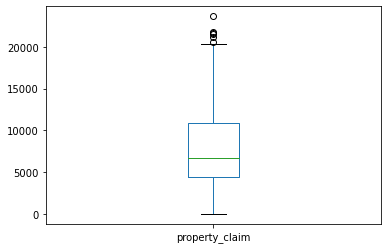

<Figure size 432x360 with 0 Axes>

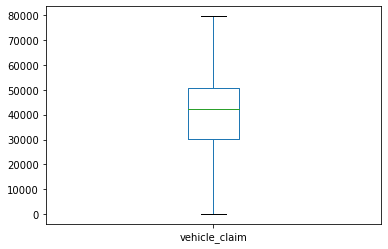

In [55]:
for i in df_continous:
    plt.figure(figsize = [6,5])
    df_continous[[i]].plot.box()
    plt.show()

observations:
1. Very few outliers are present in the age and are very close to the whisker.
2. policy_annual_premium has very few outliers close to both upper and lower whisker.
3. Umbrella limit has a lot of outliers.
4. total_claim_amount has only one outlier.
5. property claim has most of the outliers near upper whisker.

In [56]:
from scipy.stats import zscore
z = np.abs(zscore(df_continous))
threshold = 3
print(np.where(z>3))

(array([ 31,  48,  88, 115, 119, 229, 248, 262, 314, 430, 458, 500, 503,
       657, 700, 763, 807, 875, 922, 975], dtype=int64), array([ 4,  4,  4,  4,  4,  3,  3,  4,  4,  4,  4, 14,  4,  4,  4,  3,  7,
        4,  4,  4], dtype=int64))


In [58]:
for i in df_continous:
    df[i] = df_continous[i]
df_new = df[(z<3).all(axis = 1)]
df_new.shape

(980, 39)

In [59]:
print(((1000 - 980)/1000)*100)

2.0


In [125]:
df_categorical1 = df_new.drop(["months_as_customer","age","policy_deductable","policy_annual_premium","umbrella_limit","insured_zip","capital-gains","capital-loss",
                  "incident_hour_of_the_day","number_of_vehicles_involved","bodily_injuries","witnesses",'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim','policy_number','policy_bind_date','incident_location','auto_model'],axis = 1)

In [126]:
#by using label encoder we'll be converting all the categorical features into computer readable form.
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
for i in df_categorical1:
    df_new[[i]] = LE.fit_transform(df_categorical1[[i]])


In [130]:
df_new["auto_model"] = LE.fit_transform(df_new["auto_model"])

In [131]:
df_new

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17-10-2014,2,1,1000,1406.91,0,466132,1,4,2,17,0,53300,0,49,2,2,0,4,4,1,9935 4th Drive,5,1,1,1,2,1,71610,6510,13020,52080,10,1,9,1
1,228,42,342868,27-06-2006,1,1,2000,1197.22,5000000,468176,1,4,6,15,2,0,0,41,3,2,1,4,5,5,6608 MLK Hwy,8,1,1,0,0,1,5070,780,780,3510,8,12,12,1
2,134,29,687698,06-09-2000,2,0,2000,1413.14,5000000,430632,0,6,11,2,3,35100,0,44,0,1,1,4,1,1,7121 Francis Lane,7,3,0,2,3,0,34650,7700,3850,23100,4,30,12,0
3,256,41,227811,25-05-1990,0,1,2000,1415.74,6000000,608117,0,6,1,2,4,48900,-62400,19,2,0,0,4,2,0,6956 Maple Drive,5,1,0,1,2,0,63400,6340,6340,50720,3,34,19,1
4,228,44,367455,06-06-2014,0,2,1000,1583.91,6000000,610706,1,0,11,2,4,66000,-46000,34,3,0,1,2,1,0,3041 3rd Ave,20,1,0,0,1,0,6500,1300,650,4550,0,31,14,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,2,2,1000,1310.80,0,431289,0,5,2,13,4,0,0,44,2,0,1,1,0,4,6045 Andromedia St,20,1,1,0,1,1,87200,17440,8720,61040,6,6,11,0
996,285,41,186934,05-01-2014,0,0,1000,1436.79,0,608177,0,6,9,17,5,70900,0,47,2,1,0,1,4,3,3092 Texas Drive,23,1,1,2,3,1,108480,18080,18080,72320,13,28,20,0
997,130,34,918516,17-02-2003,2,1,500,1383.49,3000000,442797,0,5,1,3,2,35100,0,45,0,2,1,4,0,0,7629 5th St,4,3,1,2,3,1,67500,7500,7500,52500,11,19,1,0
998,458,62,533940,18-11-2011,0,2,2000,1356.92,5000000,441714,1,0,5,0,5,0,0,52,2,1,0,3,1,0,6128 Elm Lane,2,1,1,0,1,1,46980,5220,5220,36540,1,5,3,0


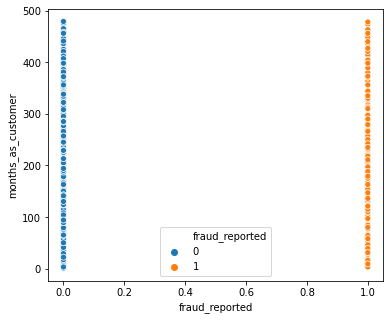

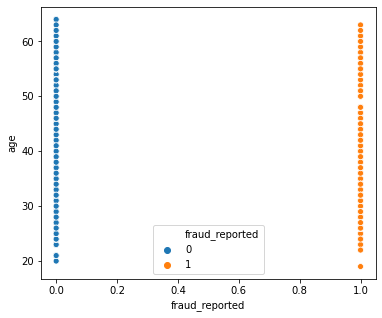

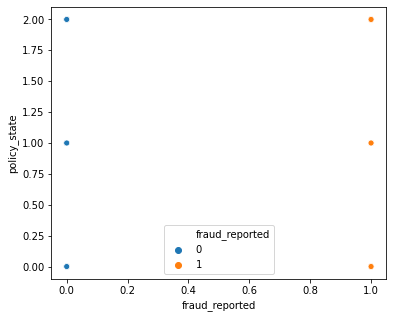

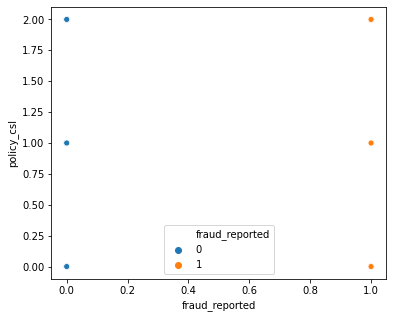

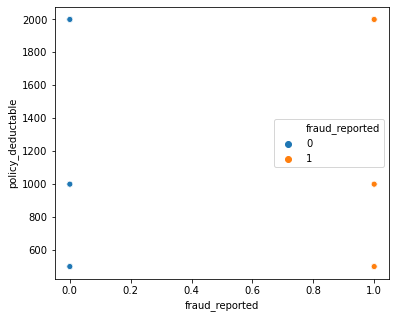

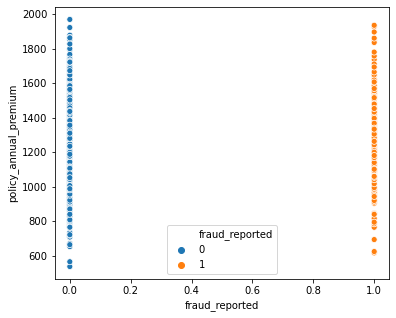

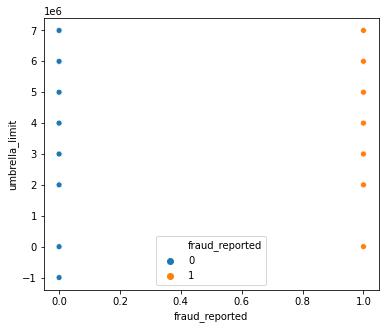

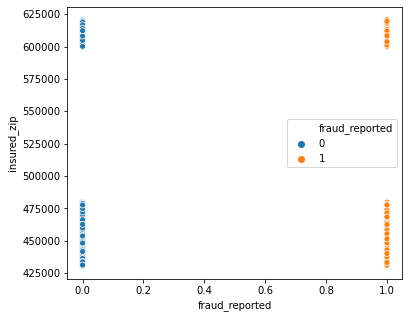

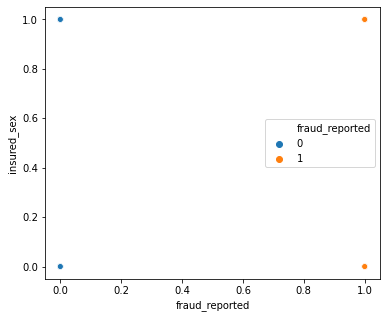

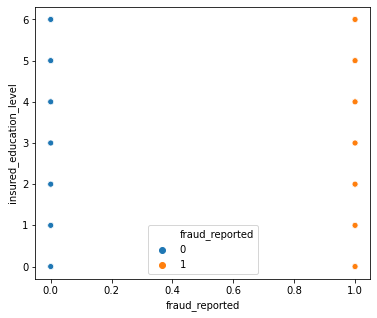

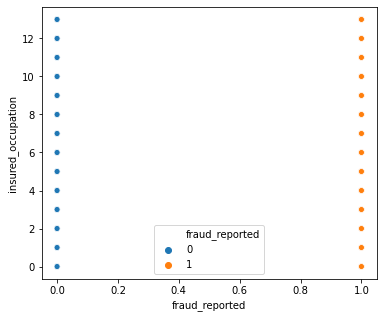

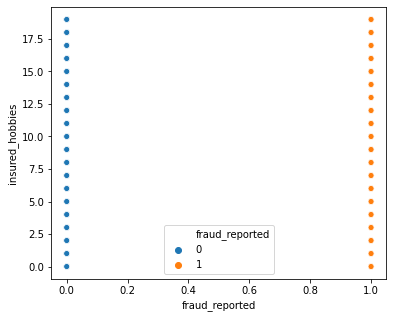

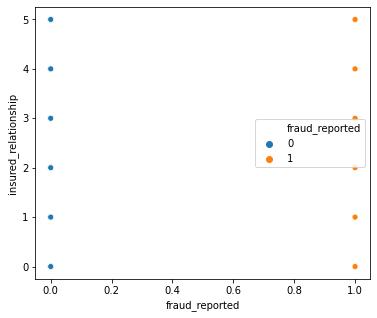

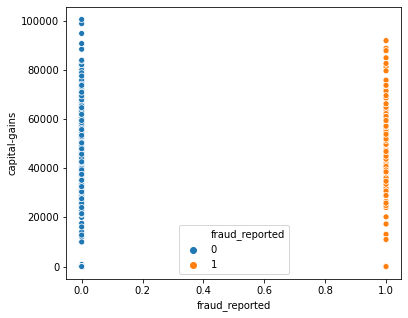

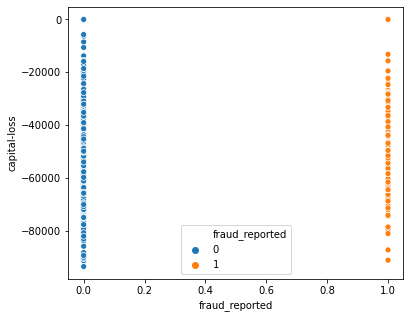

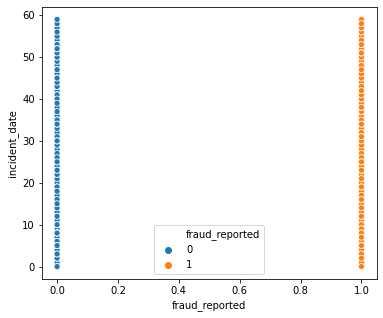

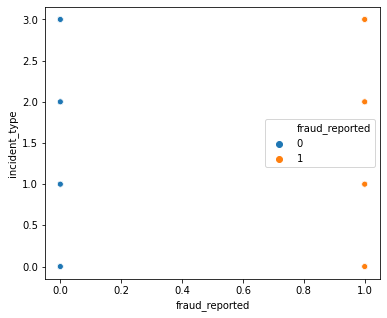

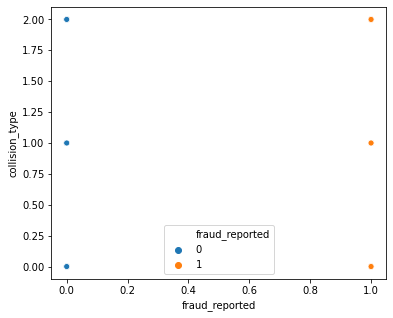

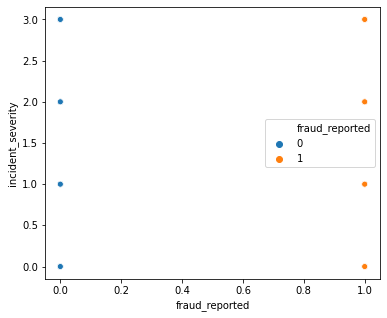

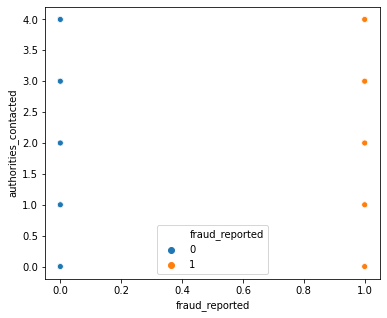

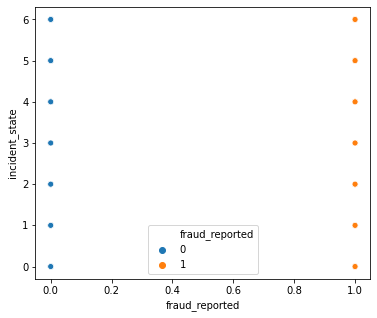

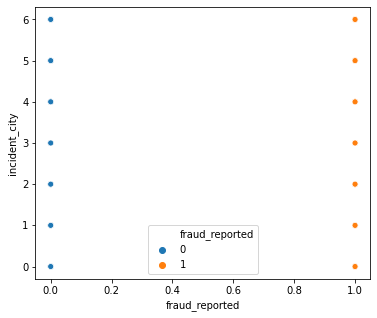

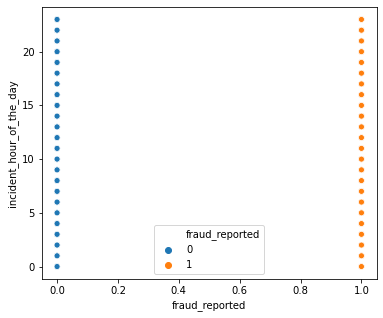

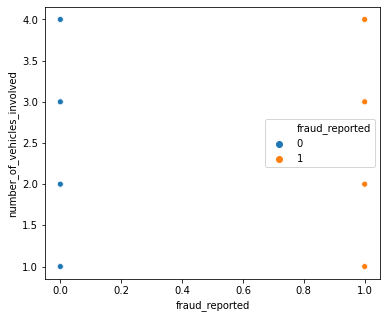

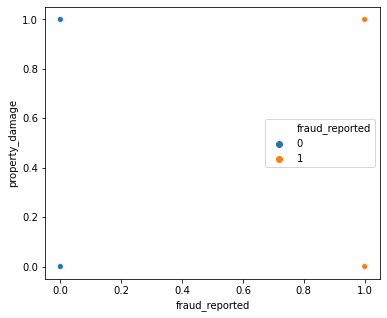

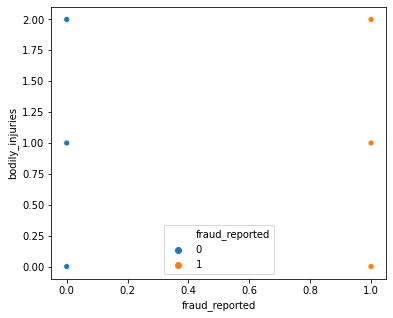

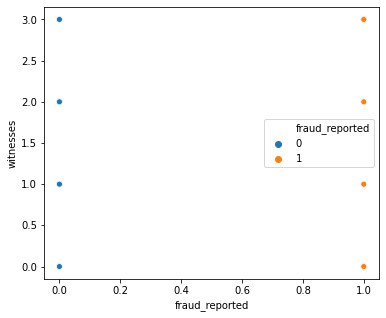

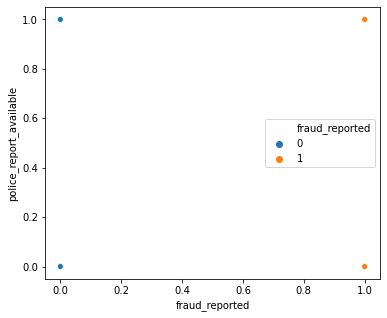

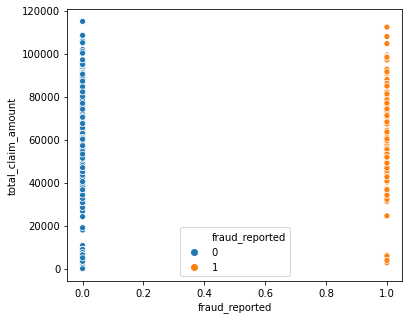

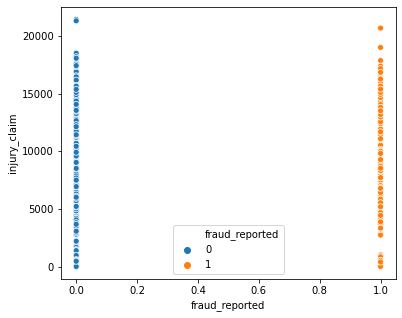

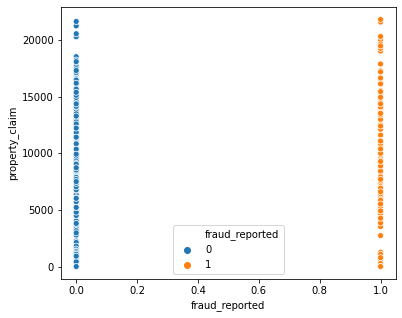

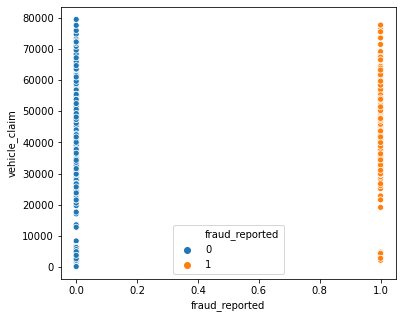

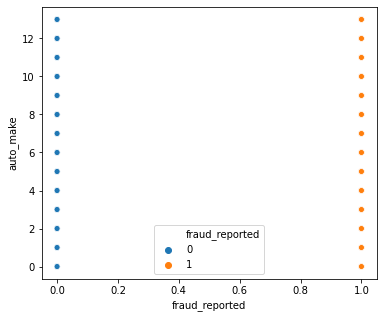

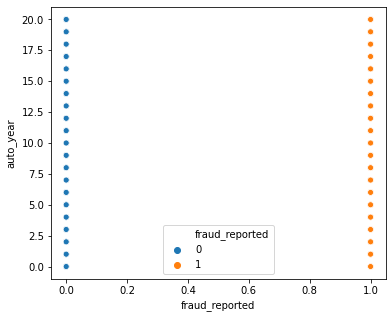

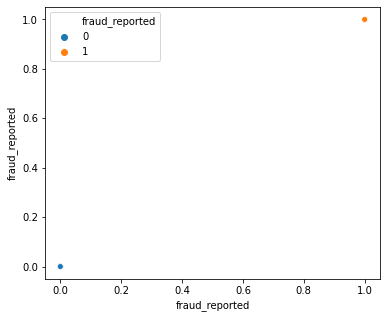

In [65]:
#we will see relationship of all the features with the target variable using scatterplot.
df_plot = df_new.drop(["policy_number","policy_bind_date","incident_location","auto_model"],axis = 1)
for i in df_plot:
    plt.figure(figsize = [6,5])
    x = df["fraud_reported"]
    y = df_plot[i]
    plt.xlabel("fraud reported")
    plt.ylabel(i)
    sns.scatterplot(x,y , hue = df["fraud_reported"])
    plt.show()

In [137]:
#here we'll be checking co relation of the variables with eachother
corr_matrix = df_new.corr()
#now we'll look at  the correlation of the all variables with the target variable
corr=corr_matrix['fraud_reported'].sort_values(ascending = False)
corr = pd.DataFrame(corr)
corr

,fraud_reported
fraud_reported,1.000000
vehicle_claim,0.170782
total_claim_amount,0.163969
property_claim,0.139101
injury_claim,0.088812
witnesses,0.049974
property_damage,0.048180
umbrella_limit,0.044729
number_of_vehicles_involved,0.043535
bodily_injuries,0.039184


Observation:Vehicle claim is highly correlated to the target feature (positively).whereas incident_severity is negatively correlated to the target feature.insured_occupation is least correlated to the target feature.


In [138]:
#We'll check if any skewness is present in each of the variables
df_new.skew()

months_as_customer             0.362608
age                            0.475385
policy_number                  0.036283
policy_state                  -0.038157
policy_csl                     0.098248
policy_deductable              0.476090
policy_annual_premium          0.035964
umbrella_limit                 1.801424
insured_zip                    0.837283
insured_sex                    0.139324
insured_education_level        0.006286
insured_occupation            -0.055360
insured_hobbies               -0.061488
insured_relationship           0.078339
capital-gains                  0.466619
capital-loss                  -0.376884
incident_date                  0.002604
incident_type                  0.090563
collision_type                -0.049390
incident_severity              0.277726
authorities_contacted         -0.114044
incident_state                -0.149255
incident_city                  0.043882
incident_hour_of_the_day      -0.039280
number_of_vehicles_involved    0.509725


In [140]:
#spliting the data into x and y
x2 = df_new.drop(["fraud_reported"],axis = 1)
y = df_new["fraud_reported"]

In [91]:
df_skew = df_new[["vehicle_claim","total_claim_amount"]]

In [102]:
#here we'll be removing skewness using power tranformer and boxcox method
from sklearn.preprocessing import PowerTransformer
power = PowerTransformer()
for i in df_skew:
    x2[i] = power.fit_transform(x2[[i]])

In [141]:
from scipy.stats import boxcox
x2["insured_zip"] = boxcox(x2["insured_zip"],0)
x2["insured_zip"].skew()

0.8025532731863674

In [142]:
x2["insured_zip"] = boxcox(x2["insured_zip"],0)
x2["insured_zip"].skew()

0.7996018124934238

In [143]:
x2["insured_zip"] = boxcox(x2["insured_zip"],0)
x2["insured_zip"].skew()

0.7984431115483975

In [144]:
x2["insured_zip"] = boxcox(x2["insured_zip"],0)
x2["insured_zip"].skew()

0.7972103107841371

In [145]:
x2["insured_zip"] = power.fit_transform(x2[["insured_zip"]])
x2["insured_zip"].skew()

0.4259527640053775

In [146]:
x2["vehicle_claim"] = boxcox(x2["vehicle_claim"],0)
x2["vehicle_claim"].skew()

-1.6764899463218925

In [147]:
x2["vehicle_claim"].skew()

-1.6764899463218925

In [148]:
x2["vehicle_claim"] = power.fit_transform(x2[["vehicle_claim"]])

In [149]:
x2["vehicle_claim"].skew()

-0.6080759791437351

In [150]:
x2["vehicle_claim"] = power.fit_transform(x2[["vehicle_claim"]])
x2["vehicle_claim"].skew()

0.04012176594690565

In [151]:
x2["total_claim_amount"] = power.fit_transform(x2[["total_claim_amount"]])
x2["total_claim_amount"].skew()

-0.5085397184973792

In [152]:
x2.skew()

months_as_customer             0.362608
age                            0.475385
policy_number                  0.036283
policy_state                  -0.038157
policy_csl                     0.098248
policy_deductable              0.476090
policy_annual_premium          0.035964
umbrella_limit                 1.801424
insured_zip                    0.425953
insured_sex                    0.139324
insured_education_level        0.006286
insured_occupation            -0.055360
insured_hobbies               -0.061488
insured_relationship           0.078339
capital-gains                  0.466619
capital-loss                  -0.376884
incident_date                  0.002604
incident_type                  0.090563
collision_type                -0.049390
incident_severity              0.277726
authorities_contacted         -0.114044
incident_state                -0.149255
incident_city                  0.043882
incident_hour_of_the_day      -0.039280
number_of_vehicles_involved    0.509725


Taking maximum skewed value between +/-5.
And we'll not be removing skewness from the target feature.

In [208]:
#Now we will be scaling the data using minmaxscaler
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()
for i in df_continous:
    x2[i]= ms.fit_transform(x2[[i]])

In [154]:
#since these features are very less correlated to the data set we can drop the following features
x2 = x2.drop(["incident_location","policy_bind_date","incident_date"],axis = 1)

In [164]:
#As we saw earlier target feature has imbalanced dataset,so we'll be balancing it first.
from imblearn.combine import SMOTETomek
from collections import Counter
os = SMOTETomek()

x_ns,y_ns = os.fit_resample(x2,y)
print("The Number of classes before fit {} ".format(Counter(y)))
print("The Number of classes After fit {} ".format(Counter(y_ns)))

The Number of classes before fit Counter({0: 740, 1: 240}) 
The Number of classes After fit Counter({0: 537, 1: 537}) 


In [165]:
#We'll be finding random state using the following method
from sklearn.linear_model import LogisticRegression
Maxaccu = 0
Maxrow = 0
for i in range(1,400):
    x_train, x_test, y_train, y_test = train_test_split(x_ns,y_ns,test_size =.20,random_state = i)
    le = LogisticRegression()
    le.fit(x_train,y_train)
    prdle =le.predict(x_test)
    accu = accuracy_score(y_test,prdle)
    if accu>Maxaccu:
        Maxaccu = accu
        Maxrow = i
print("max accuracy is : ",Maxaccu ,"at random state : ",Maxrow)

max accuracy is :  0.6558139534883721 at random state :  304


In [166]:
#splitting the dataset in test and train.
x_train, x_test, y_train, y_test = train_test_split(x_ns,y_ns,test_size =.20,random_state = 304)

In [167]:
#first using Logistic regression to check the accuracy of the model,with the help of accuracy score,confusion matrix and classification report
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)
prdlr = lr.predict(x_test)
print(accuracy_score(y_test,prdlr))
print(confusion_matrix(y_test,prdlr))
print(classification_report(y_test,prdlr))

0.6558139534883721
[[86 28]
 [46 55]]
              precision    recall  f1-score   support

           0       0.65      0.75      0.70       114
           1       0.66      0.54      0.60       101

    accuracy                           0.66       215
   macro avg       0.66      0.65      0.65       215
weighted avg       0.66      0.66      0.65       215



observations: The accuracy of the model is 65 percent .

The model Learning: Precision value(positive predictive value) for 0 is 65% whereas the Precision value for 1 is 66% .And recall(sensitivity) for 0 is 75% and recall value for 1 is 54%. Which implies model is not much efficient.

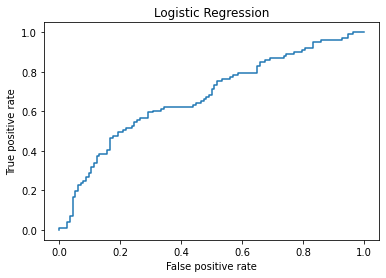

In [172]:
#using aoc roc curve to check how efficiently model is learning
from sklearn.metrics import roc_curve,roc_auc_score
y_pred_prob = lr.predict_proba(x_test)[:,1]
fpr,tpr,thresholds = roc_curve(y_test,y_pred_prob)
#plottig the aoc roc graph
plt.plot(fpr,tpr,label = 'Logistic Regression')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Logistic Regression')
plt.show()

Observations: area under the curve is very less which means model is nt learning effectively.

In [168]:
#Using Random Forest Classifier to check the accuracy of the model,with the help of accuracy score,confusion matrix and classification report
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)
prdrfc = rfc.predict(x_test)
print(accuracy_score(y_test,prdrfc))
print(confusion_matrix(y_test,prdrfc))
print(classification_report(y_test,prdrfc))

0.8697674418604651
[[96 18]
 [10 91]]
              precision    recall  f1-score   support

           0       0.91      0.84      0.87       114
           1       0.83      0.90      0.87       101

    accuracy                           0.87       215
   macro avg       0.87      0.87      0.87       215
weighted avg       0.87      0.87      0.87       215



Observation: The accuracy of the model is 86.9 percent .

The model Learning: Precision value(positive predictive value) for 0 is 91% whereas the Precision value for 1 is also 83% .And recall(sensitivity) for 0 is 84% and recall value for 1 is 90%. Which implies model is efficient.

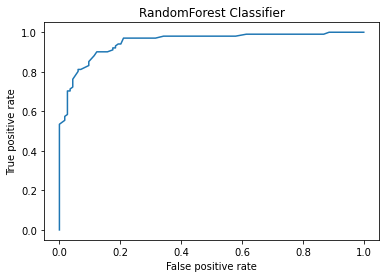

In [175]:
#using aoc roc curve to check how efficiently model is learning
y_pred_prob = rfc.predict_proba(x_test)[:,1]
fpr,tpr,thresholds = roc_curve(y_test,y_pred_prob)
#plottig the aoc roc graph
plt.plot(fpr,tpr,label = 'RandomForest Classifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('RandomForest Classifier')
plt.show()

observations: Area under the curve is ver high which means the model islearning efficiently.

In [169]:
#Using DecisionTree Classifier to check the accuracy of the model,with the help of accuracy score,confusion matrix and classification report
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)
prdtc = dtc.predict(x_test)
print(accuracy_score(y_test,prdtc))
print(confusion_matrix(y_test,prdtc))
print(classification_report(y_test,prdtc))

0.8093023255813954
[[86 28]
 [13 88]]
              precision    recall  f1-score   support

           0       0.87      0.75      0.81       114
           1       0.76      0.87      0.81       101

    accuracy                           0.81       215
   macro avg       0.81      0.81      0.81       215
weighted avg       0.82      0.81      0.81       215



Observation: The accuracy of the model is 80.9 percent .

The model Learning: Precision value(positive predictive value) for 0 is 87% whereas the Precision value for 1 is also 76% .And recall(sensitivity) for 0 is 75% and recall value for 1 is 85%. Which implies model is efficient.

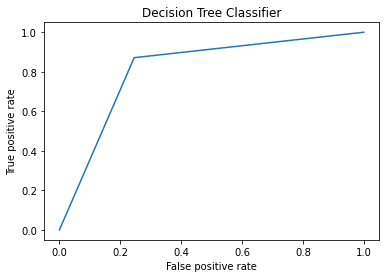

In [176]:
#using aoc roc curve to check how efficiently model is learning
y_pred_prob = dtc.predict_proba(x_test)[:,1]
fpr,tpr,thresholds = roc_curve(y_test,y_pred_prob)
plt.plot(fpr,tpr,label = 'Decision tree classifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Decision Tree Classifier')
plt.show()

observations:Area under the curve is ver high which means the model islearning efficiently

In [170]:
#using boosting technique to build model
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(x_train,y_train)
prdgbc = gbc.predict(x_test)
print(accuracy_score(y_test,prdgbc))
print(confusion_matrix(y_test,prdgbc))
print(classification_report(y_test,prdgbc))

0.8744186046511628
[[98 16]
 [11 90]]
              precision    recall  f1-score   support

           0       0.90      0.86      0.88       114
           1       0.85      0.89      0.87       101

    accuracy                           0.87       215
   macro avg       0.87      0.88      0.87       215
weighted avg       0.88      0.87      0.87       215



Observation: The accuracy of the model is 87 percent .

The model Learning: Precision value(positive predictive value) for 0 is 90% whereas the Precision value for 1 is also 85% .And recall(sensitivity) for 0 is 86% and recall value for 1 is 89%. Which implies model is efficient.

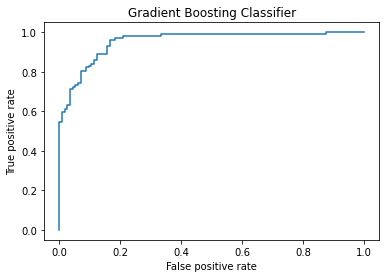

In [177]:
#using aoc roc curve to check how efficiently model is learning
from sklearn.metrics import roc_curve,roc_auc_score
y_pred_prob = gbc.predict_proba(x_test)[:,1]
fpr,tpr,thresholds = roc_curve(y_test,y_pred_prob)
plt.plot(fpr,tpr,label = 'Gradient Bossting Classifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Gradient Boosting Classifier')
plt.show()

observations:Area under the curve is ver high which means the model is learning efficiently.

In [190]:
#Using Support Vector Classifier to check the accuracy of the model,with the help of accuracy score,confusion matrix and classification report
from sklearn.svm import SVC
svc = SVC(kernel = "linear")
svc.fit(x_train,y_train)
prdsvc = svc.predict(x_test)
print(accuracy_score(y_test,prdsvc))
print(confusion_matrix(y_test,prdsvc))
print(classification_report(y_test,prdsvc))

0.586046511627907
[[94 20]
 [69 32]]
              precision    recall  f1-score   support

           0       0.58      0.82      0.68       114
           1       0.62      0.32      0.42       101

    accuracy                           0.59       215
   macro avg       0.60      0.57      0.55       215
weighted avg       0.59      0.59      0.56       215



Observation: The accuracy of the model is 58 percent .

The model Learning: Precision value(positive predictive value) for 0 is 58% whereas the Precision value for 1 is also 62% .And recall(sensitivity) for 0 is 82% and recall value for 1 is 32%. Which implies model is very less efficient.

In [184]:
#checking accuracy of support vector machine on different kernels.
kernelsvc = ["rbf","poly"]
for i in kernelsvc:
    svc = SVC(kernel = i)
    svc.fit(x_train,y_train)
    prdsvc = svc.predict(x_test)
    print("Showing result for Support Vector Classification Model : ", i)
    print(accuracy_score(y_test,prdsvc))
    print(confusion_matrix(y_test,prdsvc))
    print(classification_report(y_test,prdsvc)) 

Showing result for Support Vector Classification Model :  rbf
0.5441860465116279
[[40 74]
 [24 77]]
              precision    recall  f1-score   support

           0       0.62      0.35      0.45       114
           1       0.51      0.76      0.61       101

    accuracy                           0.54       215
   macro avg       0.57      0.56      0.53       215
weighted avg       0.57      0.54      0.53       215

Showing result for Support Vector Classification Model :  poly
0.5116279069767442
[[27 87]
 [18 83]]
              precision    recall  f1-score   support

           0       0.60      0.24      0.34       114
           1       0.49      0.82      0.61       101

    accuracy                           0.51       215
   macro avg       0.54      0.53      0.48       215
weighted avg       0.55      0.51      0.47       215



Observation: Looking at both the models we concluded that neither of the model is learning less.Hence model is very less efficient.

In [185]:
#using cross validation score to check the actual learning of models

In [187]:
from sklearn.model_selection import cross_val_score
scr = cross_val_score(lr,x_ns,y_ns,cv = 5)
print("Cross validation score of Logistic Regression is ",scr.mean())

Cross validation score of Logistic Regression is  0.5


In [188]:
from sklearn.model_selection import cross_val_score
scr = cross_val_score(dtc,x_ns,y_ns,cv = 5)
print("Cross validation score of Decision tree classifier is ",scr.mean())

Cross validation score of Decision tree classifier is  0.8082677678765485


In [199]:
scr = cross_val_score(rfc,x_ns,y_ns,cv = 5)
print("Cross validation score of Random Forest classifier is ",scr.mean())

Cross validation score of Random Forest classifier is  0.859495761790915


In [191]:
scr = cross_val_score(svc,x_ns,y_ns,cv = 5)
print("Cross validation score of Support vector classifier is ",scr.mean())

Cross validation score of Support vector classifier is  0.5093153662247338


In [192]:
scr = cross_val_score(gbc,x_ns,y_ns,cv = 5)
print("Cross validation score of Support vector classifier is ",scr.mean())

Cross validation score of Support vector classifier is  0.8511236687676591


Conclusion: From the above we can see that the difference between the cross validation scores and accuracy of Random forest is minimum.So we'll be chossing Random Forest classifier for model development.


In [193]:
#doing Hyperparameter tuning of random forest
from sklearn.model_selection import GridSearchCV
#creating parameter list to pass in GridSearchCV
parameters = {'n_estimators' : [10,100],
              'max_depth' : np.arange(2,7),
             'criterion': ['gini','entropy'],
             'max_features': ['auto','sqrt','log2']}

In [194]:
GVC = GridSearchCV(RandomForestClassifier(),parameters,cv = 5)

In [195]:
GVC.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([2, 3, 4, 5, 6]),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [10, 100]})

In [196]:
#checking the best parameters
GVC.best_params_

{'criterion': 'gini',
 'max_depth': 6,
 'max_features': 'auto',
 'n_estimators': 100}

In [198]:
#using the parameters in random forest classifier to create model
modrfc = RandomForestClassifier(criterion = 'gini',max_depth = 6,max_features = 'auto',n_estimators = 100,random_state = 304)
modrfc.fit(x_train,y_train)
pred = modrfc.predict(x_test)
print("accuracy score of the model is :",accuracy_score(y_test,pred)*100)

accuracy score of the model is : 85.5813953488372


The accuracy of the Random forest classifier model is 100 percent on the given parameters.

In [200]:
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[93 21]
 [10 91]]
              precision    recall  f1-score   support

           0       0.90      0.82      0.86       114
           1       0.81      0.90      0.85       101

    accuracy                           0.86       215
   macro avg       0.86      0.86      0.86       215
weighted avg       0.86      0.86      0.86       215



In [201]:
#checking the accuracy of the model.
conclusion = pd.DataFrame([modrfc.predict(x_test)[:],prdrfc[:]],index = ["predicted","original"])
conclusion

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214
predicted,0,0,1,1,1,1,1,1,0,0,0,1,1,1,0,0,1,0,1,0,0,1,0,1,0,1,1,0,1,0,1,0,0,1,0,0,1,1,1,0,0,0,1,1,0,1,1,0,0,0,0,1,0,0,1,1,1,0,0,1,0,0,0,1,0,1,0,1,1,0,1,0,1,1,1,1,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,1,1,0,1,1,1,1,0,0,1,1,0,1,1,0,0,1,1,0,0,1,0,0,0,1,1,1,1,1,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,1,0,1,1,0,1,0,0,1,1,0,1,1,0,1,0,0,1,1,1,1,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,1,0,1,1,1,0,0,1,1,0,0,0,1,1,1,1,1,1,0,0,0,1,1,1,0,1,1,1,1,0,1,1,0,1,0,1,1,1,0,1,1,0
original,0,0,1,1,1,1,1,1,0,0,1,1,1,1,0,0,0,0,1,0,0,1,0,1,0,1,1,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,1,1,0,1,1,0,0,0,0,1,0,0,1,1,1,0,0,1,0,0,0,1,0,1,0,1,1,0,1,0,1,1,1,1,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,1,1,0,1,1,1,1,0,0,1,1,0,1,1,0,0,1,1,0,0,1,0,0,0,1,1,1,1,1,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,1,0,1,1,0,1,0,0,1,1,0,1,1,0,0,0,0,1,1,1,1,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,1,0,1,1,1,0,0,1,1,0,0,0,1,1,1,1,1,1,0,0,0,1,1,1,0,1,1,1,1,0,1,1,0,1,0,1,1,1,0,1,0,0


In [202]:
#saving the model using jobib
import joblib
joblib.dump(modrfc,"automobile claim model.pkl")

['automobile claim model.pkl']